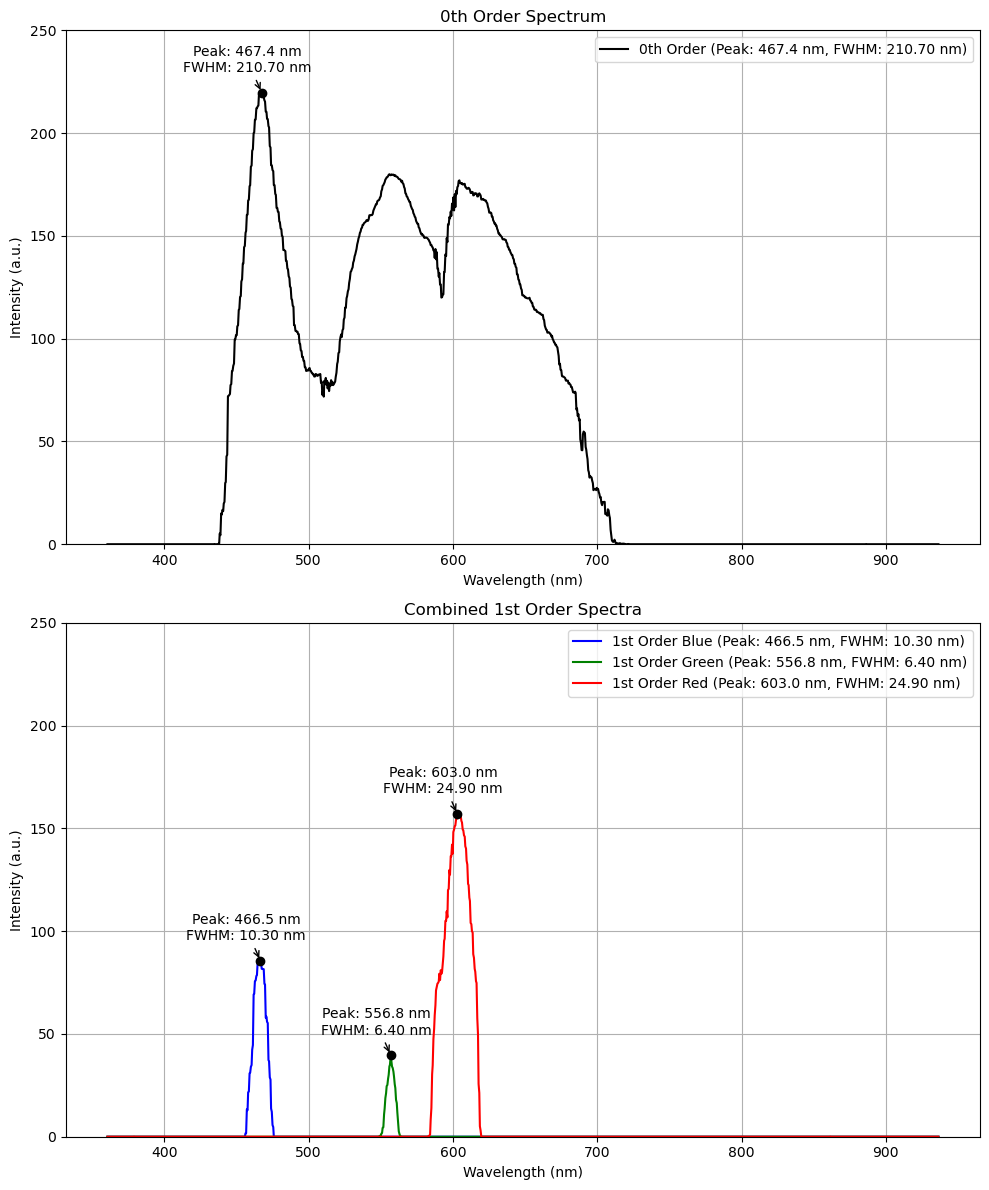

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Assumes the read_data and find_max_intensity functions are defined as before
# Function to read data from the file
def read_data(filename):
    wavelength = []
    intensity = []
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('===START==='):
                break
        for line in file:
            if line.strip() and not line.startswith('===END==='):
                wl, intens = map(float, line.split())
                wavelength.append(wl)
                intensity.append(intens)
    return np.array(wavelength), np.array(intensity)
    
def find_FWHM(wavelength, intensity):
    max_intensity = np.max(intensity)
    half_max = max_intensity / 2
    # Find indices where intensity crosses half maximum
    crosses_half_max = np.where(intensity > half_max)[0]
    if len(crosses_half_max) > 1:  # Ensure the spectrum has a clear peak
        fwhm_wavelength = wavelength[crosses_half_max[-1]] - wavelength[crosses_half_max[0]]
    else:  # If no clear peak, FWHM is 0 or undefined
        fwhm_wavelength = 0
    return fwhm_wavelength

# Updated function to plot on a single subplot and annotate peak wavelength and FWHM
def plot_on_subplot(ax, wavelength, intensity, title, color):
    max_wavelength, max_intensity = find_max_intensity(wavelength, intensity)  # Find peak
    fwhm = find_FWHM(wavelength, intensity)  # Calculate FWHM
    
    ax.plot(wavelength, intensity, label=f'{title} (Peak: {max_wavelength} nm, FWHM: {fwhm:.2f} nm)', color=color)
    ax.scatter(max_wavelength, max_intensity, color='black', zorder=5)  # Mark the peak point
    
    # Annotate the peak wavelength and FWHM
    ax.annotate(f'Peak: {max_wavelength} nm\nFWHM: {fwhm:.2f} nm',
                xy=(max_wavelength, max_intensity), 
                xytext=(max_wavelength - 10, max_intensity + 10),  # Adjust text position above the peak
                textcoords='data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
                horizontalalignment='center')
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel('Intensity (a.u.)')
    ax.legend()
    ax.grid(True)
    ax.set_ylim(0, 250)  # Fixed y-axis range

# Function to find wavelengths with maximum intensity
def find_max_intensity(wavelength, intensity):
    max_intensity = np.max(intensity)
    max_index = np.argmax(intensity)
    max_wavelength = wavelength[max_index]
    return max_wavelength, max_intensity

# Main function for rearranged subplots with peak wavelength annotations
def main():
    filepath = r'D:\OneDrive - University of Eastern Finland\classes\Photonics Laboratory\1 Kinegram\exp_data\\'
    filenames = [
        'P-0th-order-25-degrees-001.txt',
        'P-1st-order-47-degrees-blue-001.txt',
        'P-1st-order-51-degrees-Green-001.txt',
        'P-1st-order-53-degrees-Yellowish-001.txt'
    ]
    titles = ['0th Order', '1st Order Blue', '1st Order Green', '1st Order Red']
    colors = ['black', 'blue', 'green', 'red']  # Colors corresponding to each plot

    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    
    # Plot the 0th Order in the first subplot
    wavelength, intensity = read_data(os.path.join(filepath, filenames[0]))
    plot_on_subplot(axs[0], wavelength, intensity, titles[0], colors[0])
    axs[0].set_title('0th Order Spectrum')

    # Combine the 1st Order Blue, Green, Red plots in the second subplot
    for filename, title, color in zip(filenames[1:], titles[1:], colors[1:]):
        wavelength, intensity = read_data(os.path.join(filepath, filename))
        plot_on_subplot(axs[1], wavelength, intensity, title, color)
    axs[1].set_title('Combined 1st Order Spectra')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()